In [233]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import scipy.stats as stats
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
sns.set(style='whitegrid',palette='bright', context='talk', color_codes=True)

In [234]:
#Loading in the dataframe
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df.head()

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon,percapbuilt,landtypeInter,fishcrop,gdppop,excess_carbonsq,gdplog,percapbuiltlog,invexcarbon,percaplandtypes,all,fish,fishinter,graze,grazeinter
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000,1.112224,9.761824e-09,0.000010,0.001617,3.273215e+09,1.237042,6.855444,-18.444787,0.899100,2.986427e-12,33714.728454,0,0.0,1,0.189137
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000,0.535266,9.485933e-09,0.000009,0.001475,2.985931e+09,0.286510,6.786754,-18.473456,1.868230,2.809316e-12,28268.994485,0,0.0,1,0.200749
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000,0.317646,9.567022e-09,0.000017,0.001678,3.146790e+09,0.100899,6.863250,-18.464944,3.148159,5.095236e-12,52750.656568,0,0.0,1,0.317448
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000,0.416163,9.772681e-09,0.000009,0.001493,3.363329e+09,0.173192,6.950374,-18.443675,2.402903,2.863645e-12,31041.942225,0,0.0,1,0.196215
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000,0.334663,1.115981e-08,0.000011,0.001338,3.559725e+09,0.112000,7.022761,-18.310947,2.988077,3.333355e-12,37650.270604,0,0.0,1,0.223205


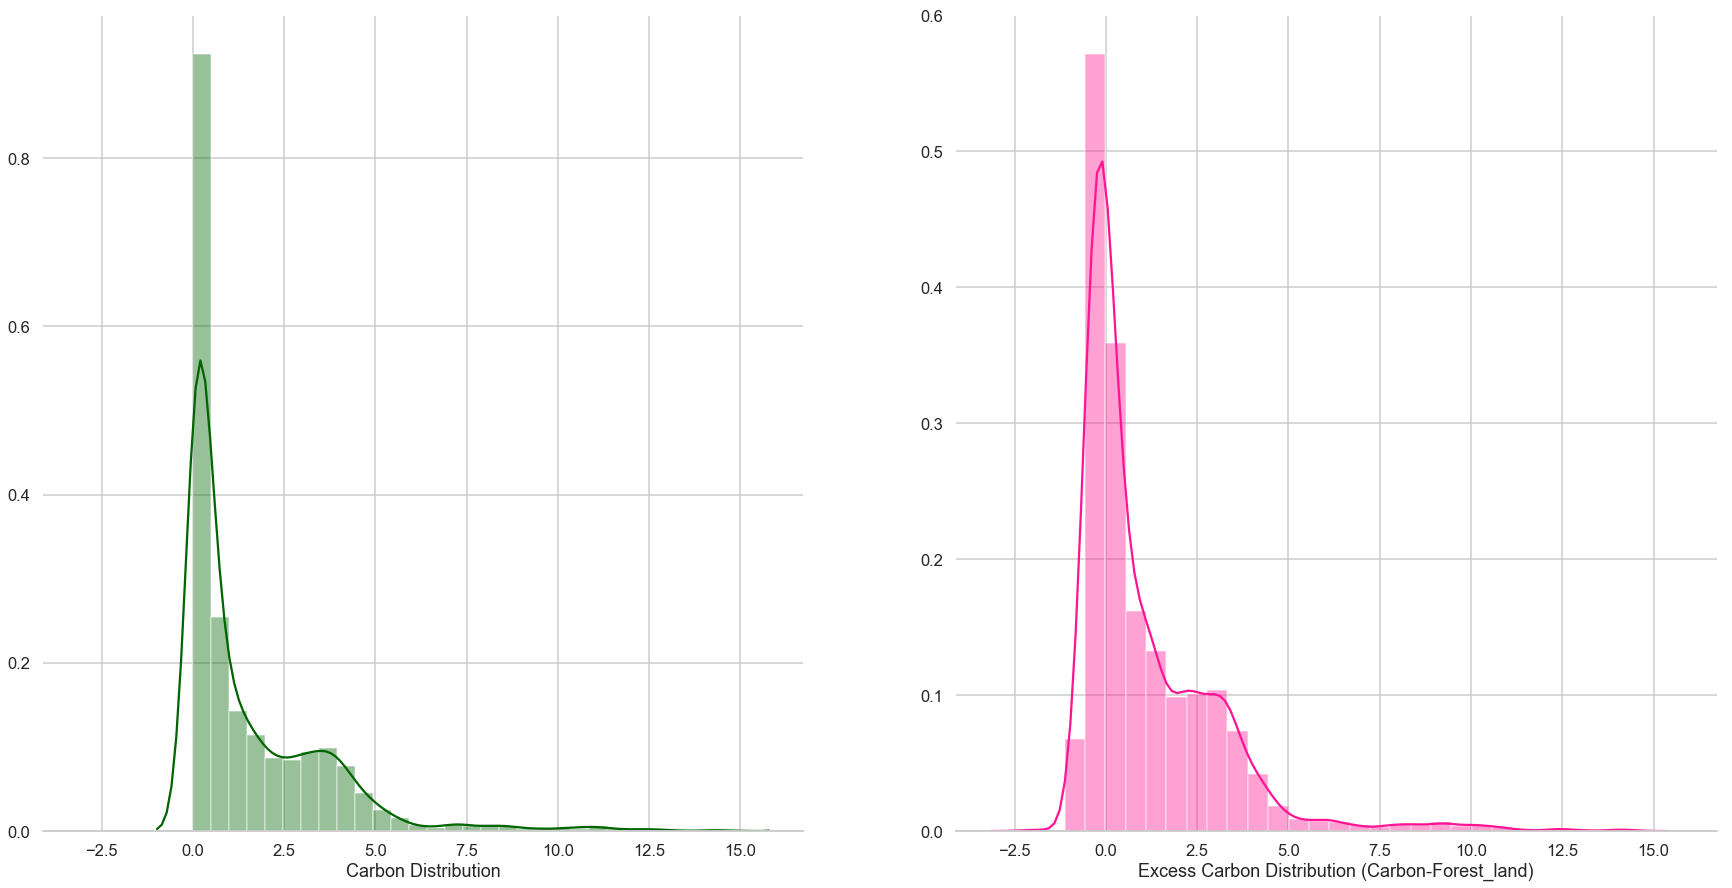

In [235]:
#Looking at the distributions of carbon vs. excess carbon (carbon-forest_land)
fig1, axes = plt.subplots(1,2,figsize=(30,15),sharex=True)
sns.despine(left=True)
sns.distplot(df['carbon'],bins=30,axlabel='Carbon Distribution',ax=axes[0],color='darkgreen')
sns.distplot(df['excess_carbon'],bins=30,axlabel='Excess Carbon Distribution (Carbon-Forest_land)',ax=axes[1],color='deeppink')
fig1.savefig('TargetDistplots.png', bbox_inches='tight')

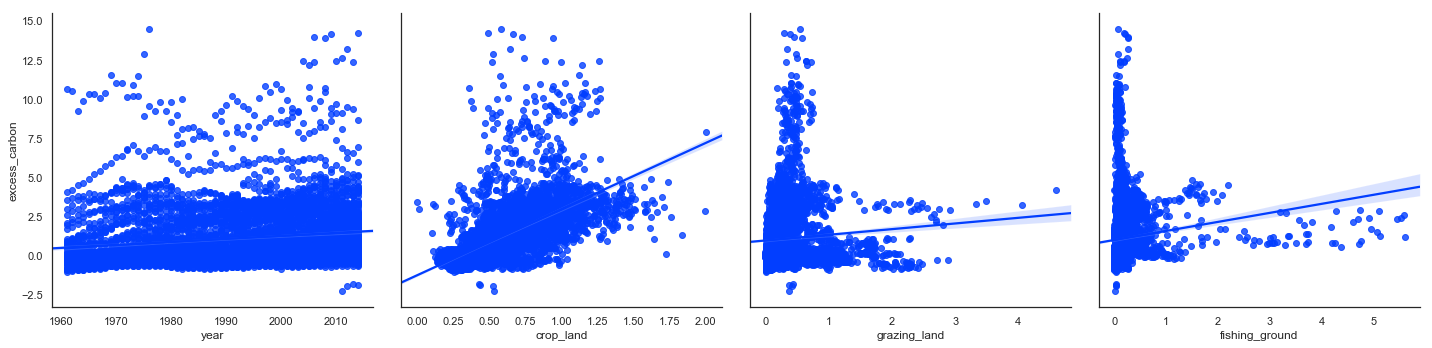

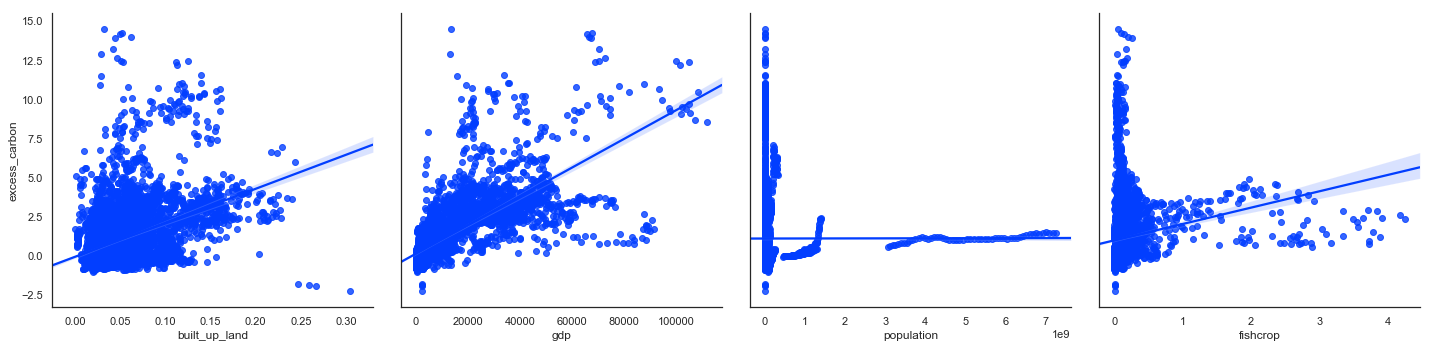

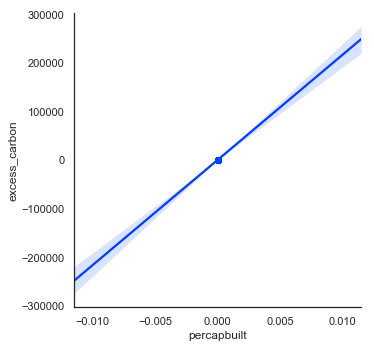

In [232]:
#Looking at scatter plots of some of the features vs. excess carbon(target)
features=['year','crop_land','grazing_land','fishing_ground','built_up_land','gdp','population','fishcrop','percapbuilt']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
x=1
for i in row_groups:
    a=sns.pairplot(df, y_vars='excess_carbon',x_vars=i,kind='reg',height=5)
    a.savefig('Scatterplots{}.png'.format(x), bbox_inches='tight')
    x+=1
    

In [236]:
#Putting excess carbon on mixmax scale in order to try log transform
d=df['excess_carbon']
dff=pd.DataFrame(d,columns=['excess_carbon'])
dff.head()
float_array=dff['excess_carbon'].values.astype(float)
float_array.reshape(1,-1)
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(float_array.reshape(-1,1))
scaled_df = pd.DataFrame(scaled_df, columns=['excess_carbon'])
df['excess_carbon_minmax']=scaled_df

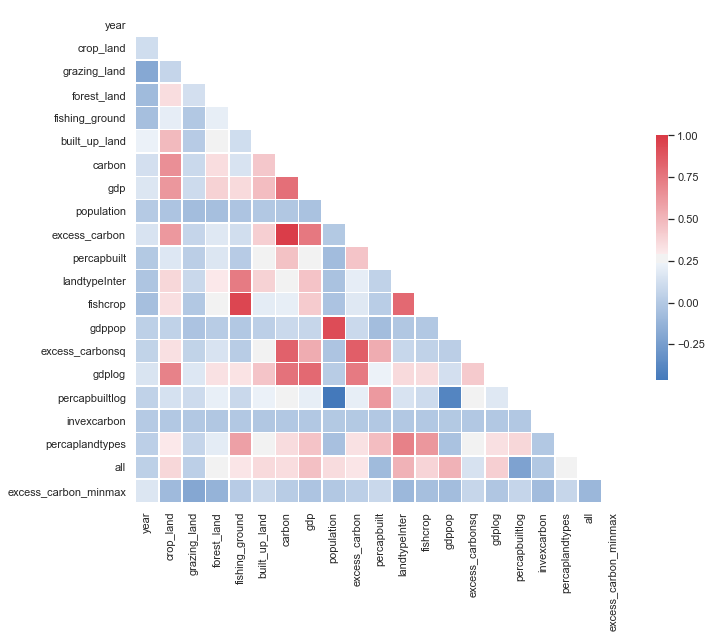

In [229]:
corr=df.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set(style = 'white')
    sns.set_palette('bright')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    return f


CorrMtx(corr, dropDuplicates = True).savefig('CorrelationMatrix', bbox_inches='tight')

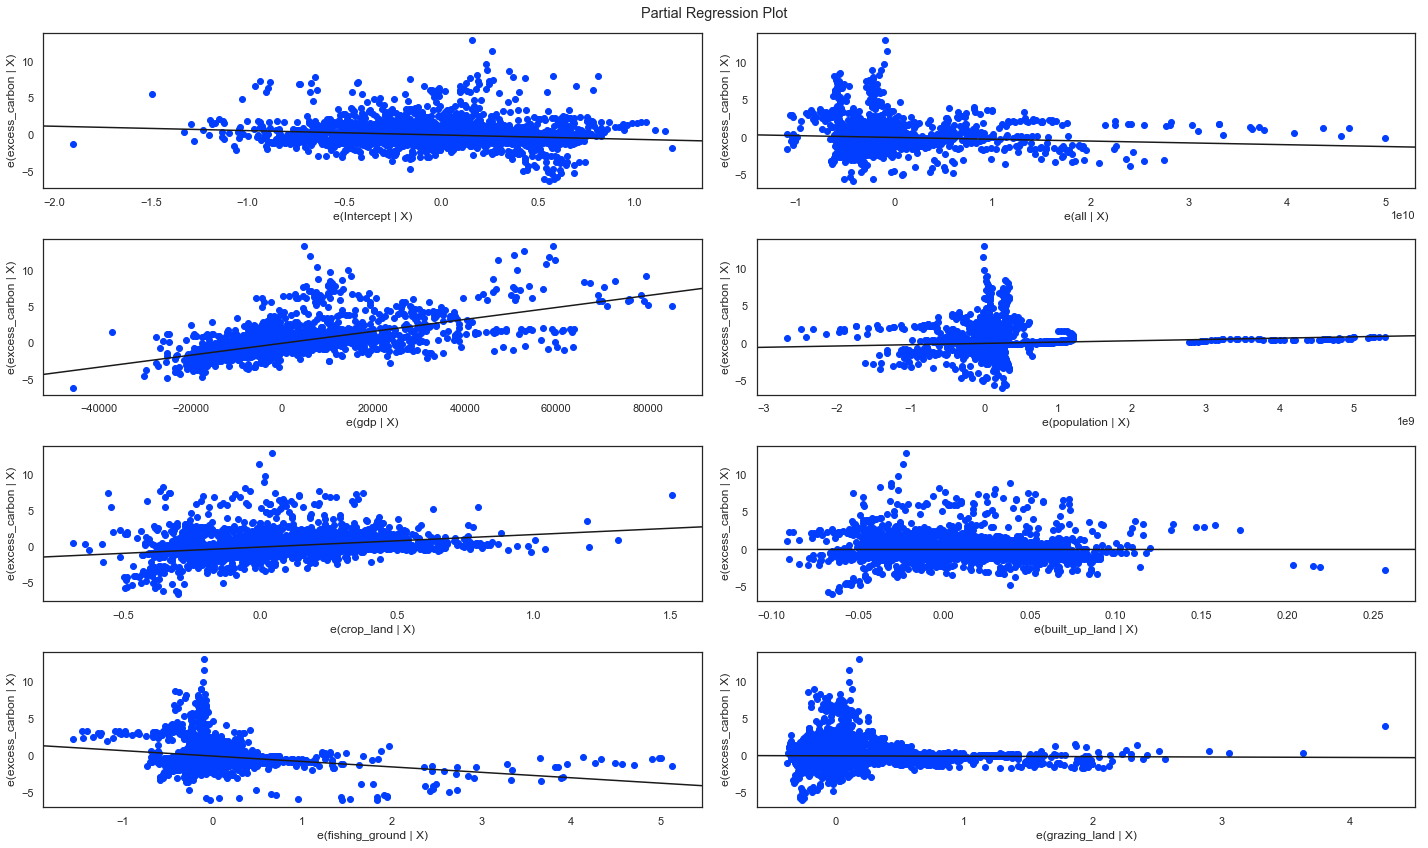

In [230]:
#Looking at partial regression plots
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig.savefig('PartialRegressions.png', bbox_inches='tight')

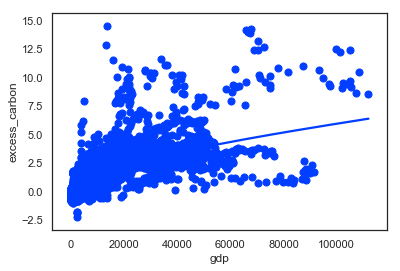

In [231]:
#Looking at relationship between gdp and excess carbon
sns.regplot(x='gdp',y='excess_carbon',data=df,x_estimator=np.mean,lowess=True)

In [194]:
#Looking at correlation between crop land and population
stats.pearsonr(df['crop_land'],df['population'])

(-0.027164347646904514, 0.045665484593592744)